<a href="https://colab.research.google.com/github/dae9999nam/COMP3314/blob/main/COMP3314_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this course, we are going to learn three different learning.

* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning


In [54]:
# 1. Dataset Loading

import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()




,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


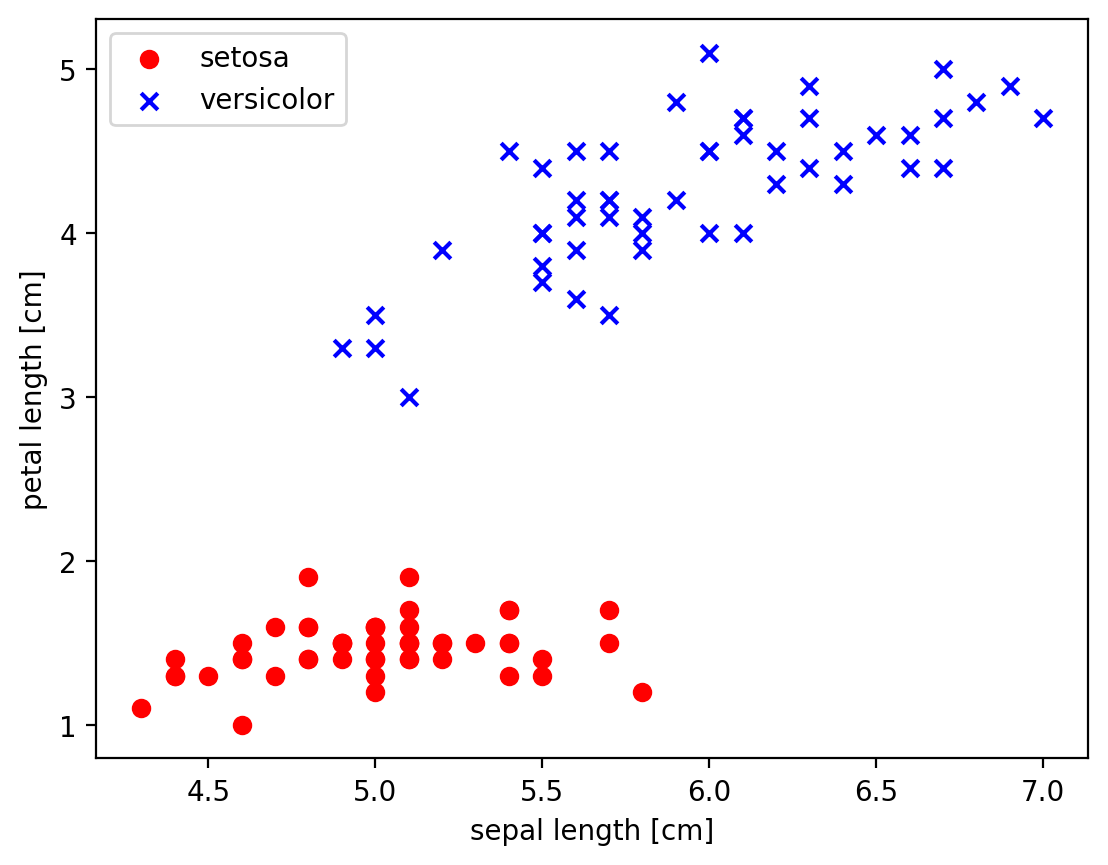

In [55]:
#Iris Dataset - Preprocessing and Plotting
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [56]:
#Perceptron - Implementation
import numpy as np

class Perceptron(object):
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi)) # (learning rate) * (true class label - predicted class label)
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)



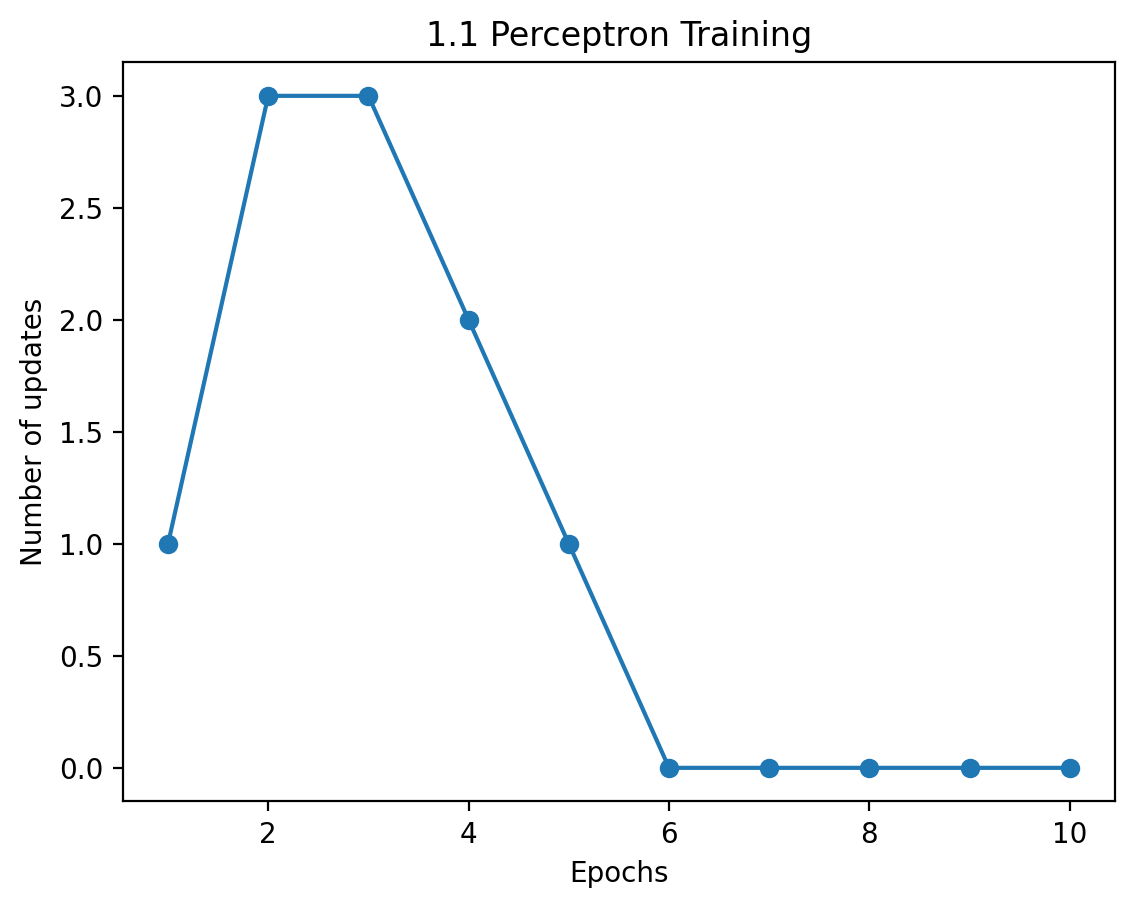

In [57]:
# Perceptron - Training

ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('1.1 Perceptron Training')
plt.show()

<ipython-input-58-e73126421d23>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


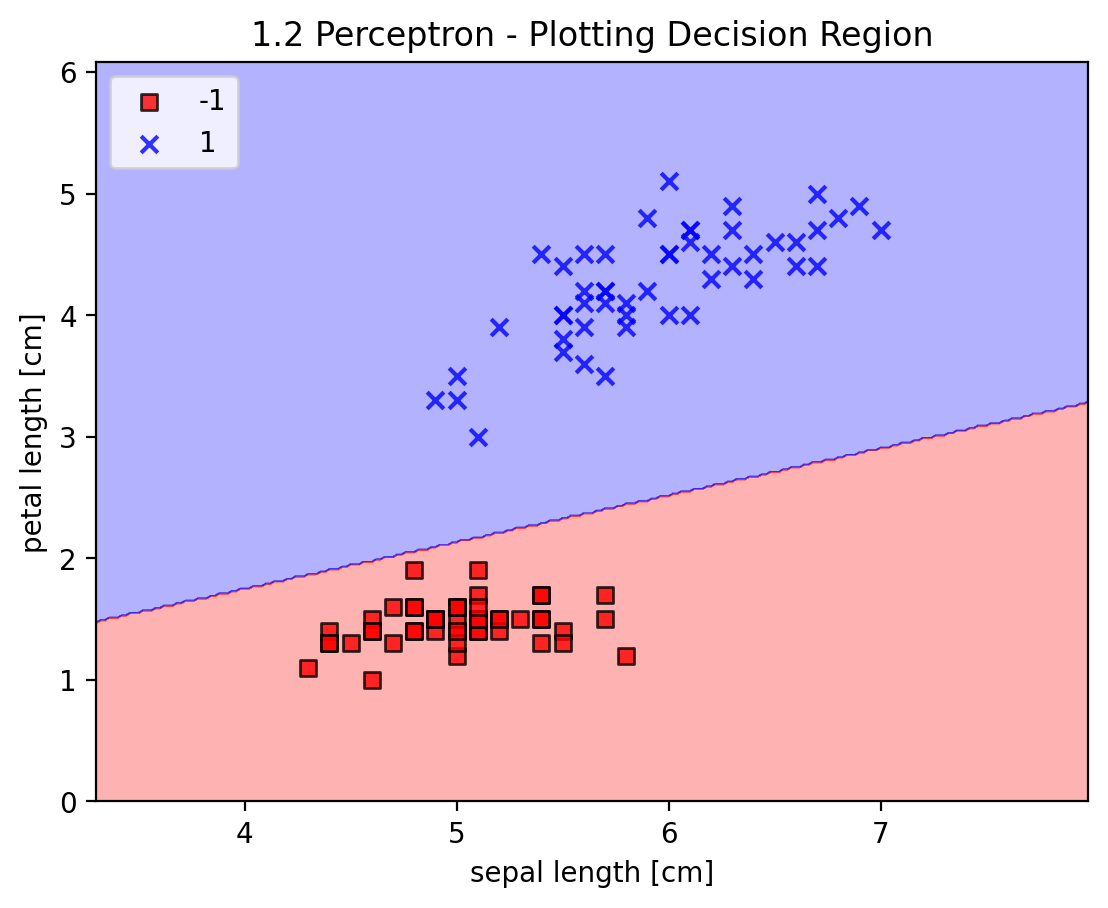

In [58]:
#Perceptron - Plotting Decision Region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx],
                label = cl, edgecolor = 'black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('1.2 Perceptron - Plotting Decision Region')
plt.legend(loc='upper left')
plt.show()

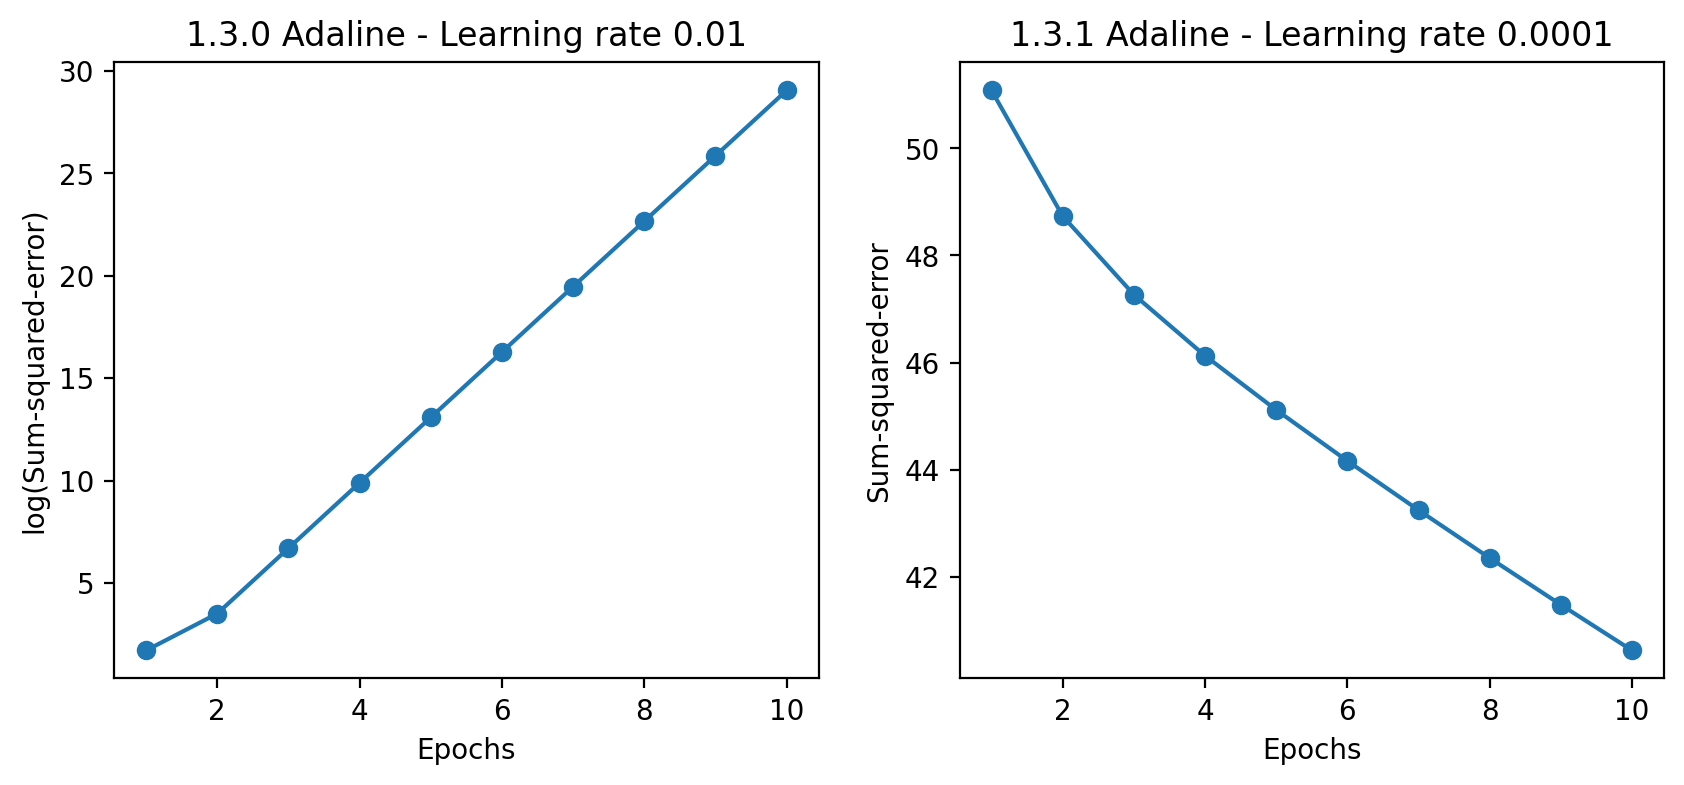

In [59]:
#Adaline - Implementation
class AdalineGD(object):
  def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    return X

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
adal = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1,len(adal.cost_) + 1), np.log10(adal.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('1.3.0 Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('1.3.1 Adaline - Learning rate 0.0001')
plt.show()

<ipython-input-58-e73126421d23>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


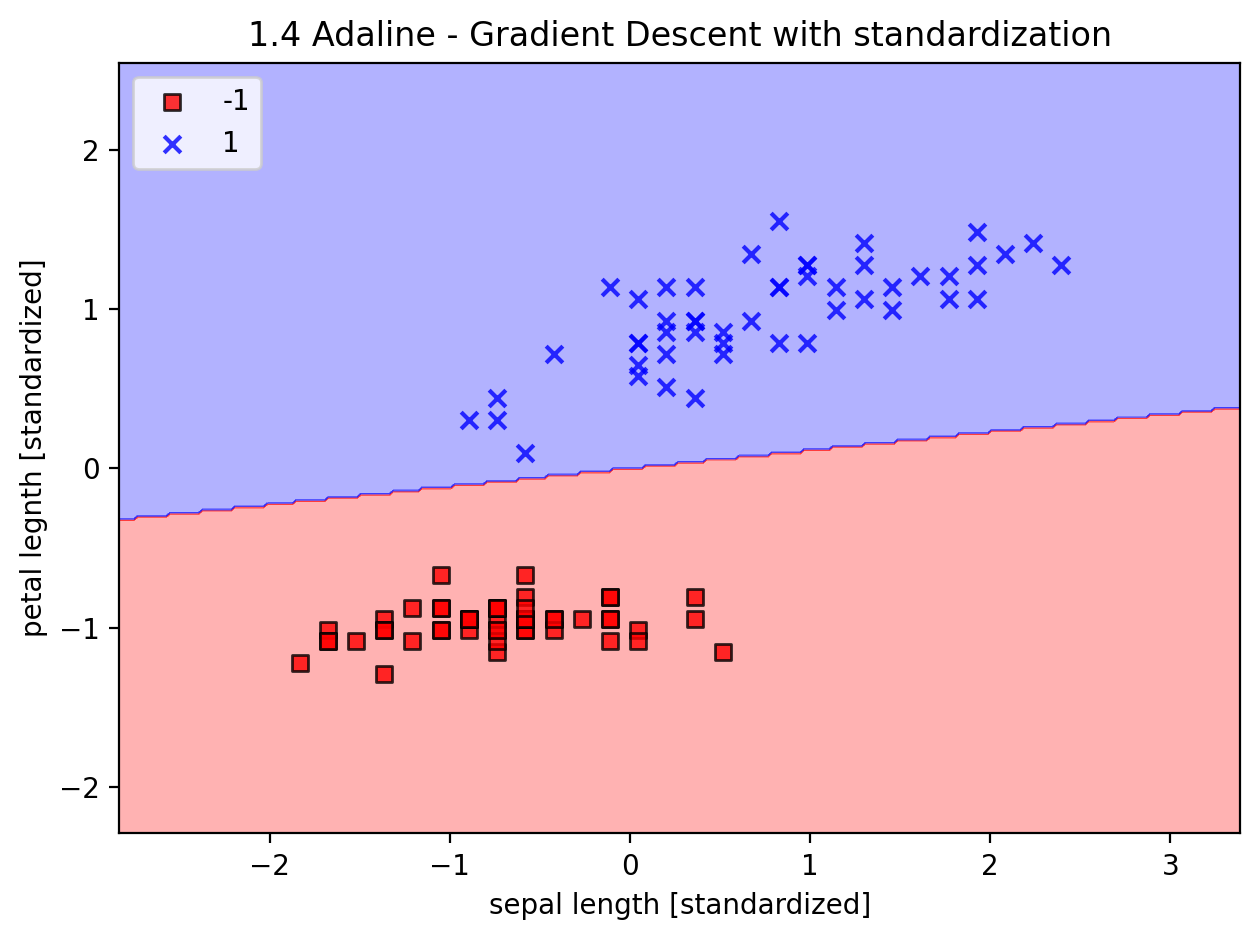

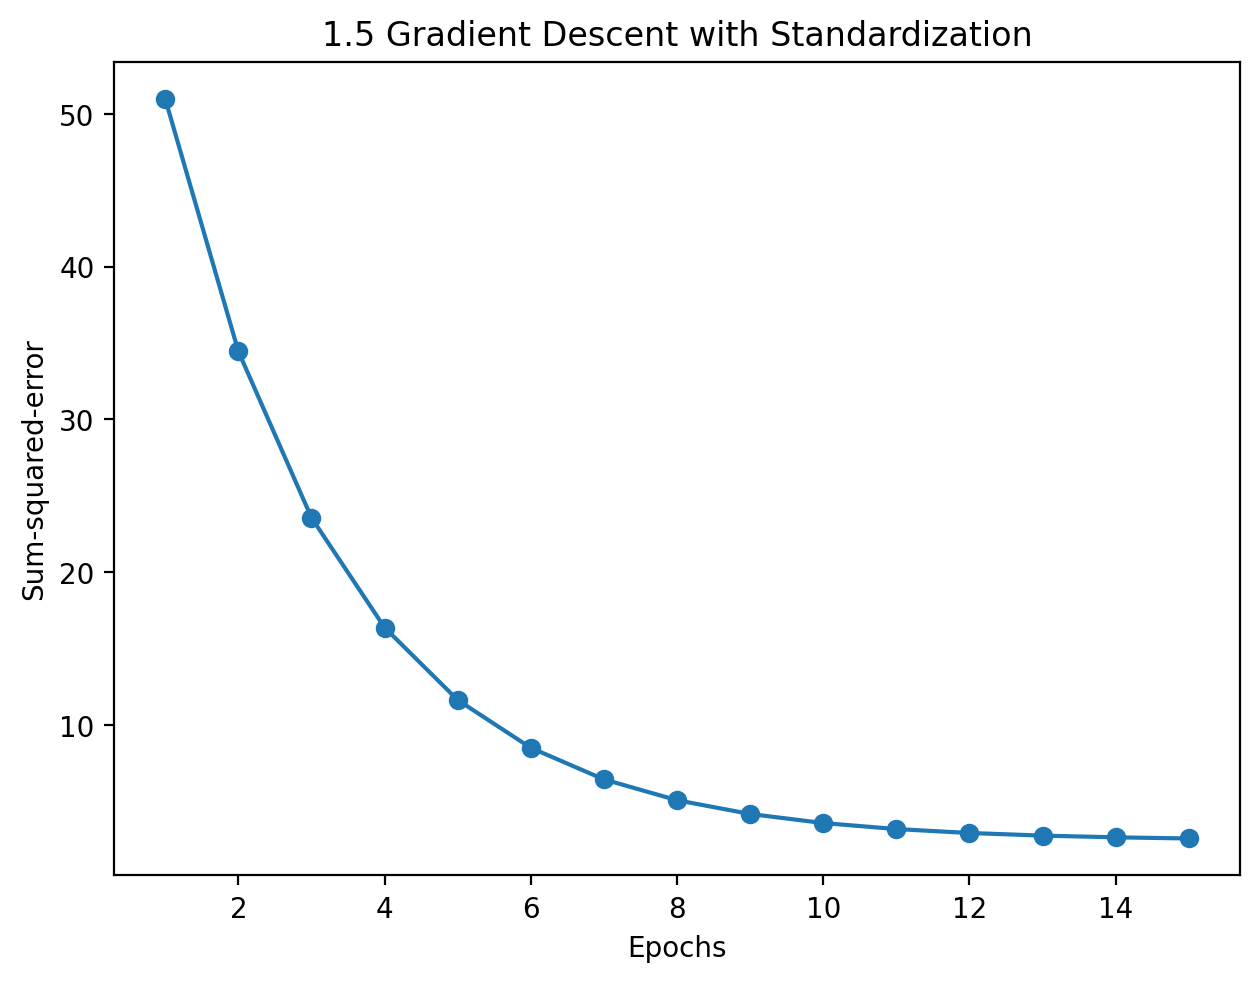

In [60]:
#Standardization
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('1.4 Adaline - Gradient Descent with standardization')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal legnth [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.title('1.5 Gradient Descent with Standardization')
plt.show()

<ipython-input-58-e73126421d23>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


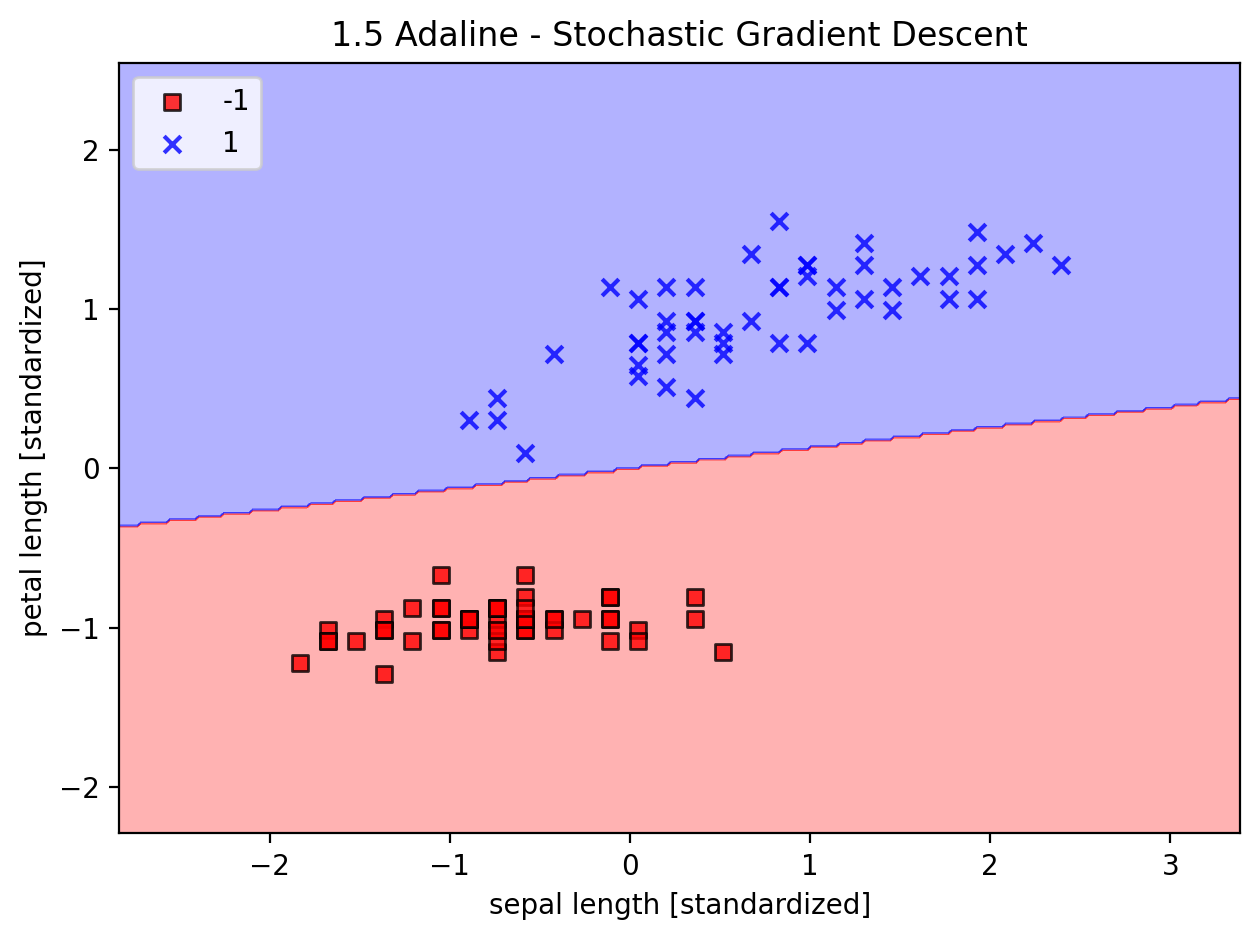

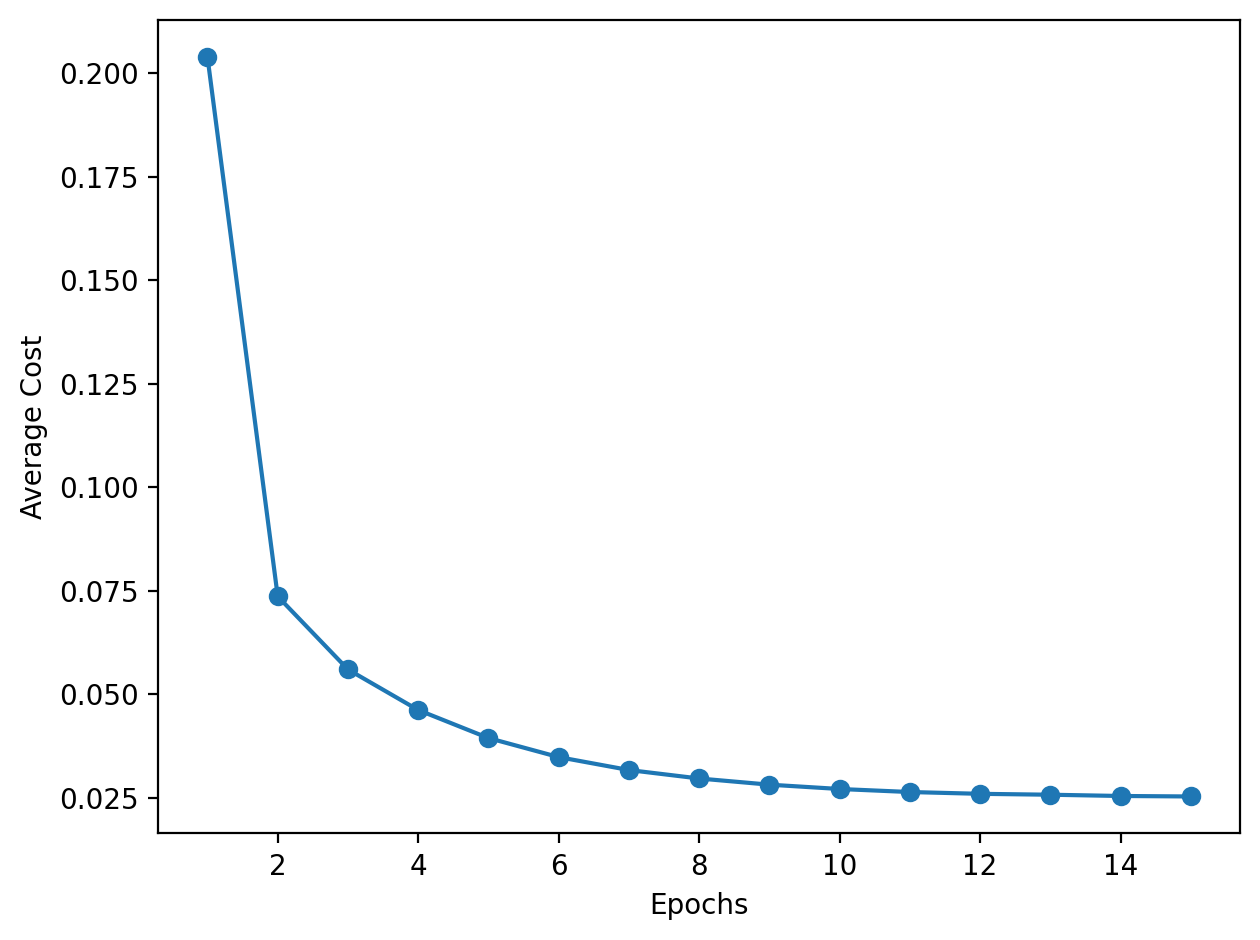

In [61]:
#Mini Batch Learning
class AdalineSGD(object):
  def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state
  def fit(self, X, y):
    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter): # for iteration
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y): # for training samples
        cost.append(self._update_weights(xi,target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self
  # for online learning, update weight with new training sample
  def partial_fit(self, X, y):
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    # check if case of newly arrived sample is more than one or not
    if y.ravel().shape[0] > 1 : #y.ravel() == flatten operation
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X,y)
    return self
  def _shuffle(self, X, y):
    r = self.rgen.permutation(len(y))
    return X[r], y[r]
  def _initialize_weights(self, m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    output = self.activation(self.net_input(xi)) # xi == current sample, activation function is linear activation function
    error = (target - output) # target is binary, output is continuous value, output is different to perceptron, binary
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2 #0.5 for cancel out 2 from derivatives
    return cost # for single traning sample. No need for overall cost
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, X):
    return X
  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

ada = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('1.5 Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

In [62]:
#Scikit-learn Libaray

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, [2,3]]
y = iris.target

import numpy as np
print('Class labels:', np.unique(y))

#Traning and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
#test_size = 30% of total data set
#dataset is sorted by label --> if we just cut the dataset into portion, training will not be done well due to biased dataset
# therefore we need stratify so that both training and testing data have same proportion of sample label

## Note that train_test_split function shuffles the training sets internally and performs stratification before splitting

print('Labels counts in y:', np.bincount(y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) #mean and standard deviation for individual data
X_train_std = sc.transform(X_train) #apply above parameters to original data
X_test_std = sc.transform(X_test)



Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Lables counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [63]:
#training
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_train_std)
print('Misclassified training samples:', (y_train != y_pred).sum()) #.sum() result shows count the number of sample not same

#Testing
y_pred = ppn.predict(X_test_std)
print('Misclassified samples:', (y_test != y_pred).sum())

#Testing - Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy using accuracy_score(): %.3f' % accuracy_score(y_test, y_pred))

#Alternatively
print('Accuracy using .score(): %.3f ' %ppn.score(X_test_std, y_test))

Misclassified training samples: 6
Misclassified samples: 1
Accuracy using accuracy_score(): 0.978
Accuracy using .score(): 0.978 


<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


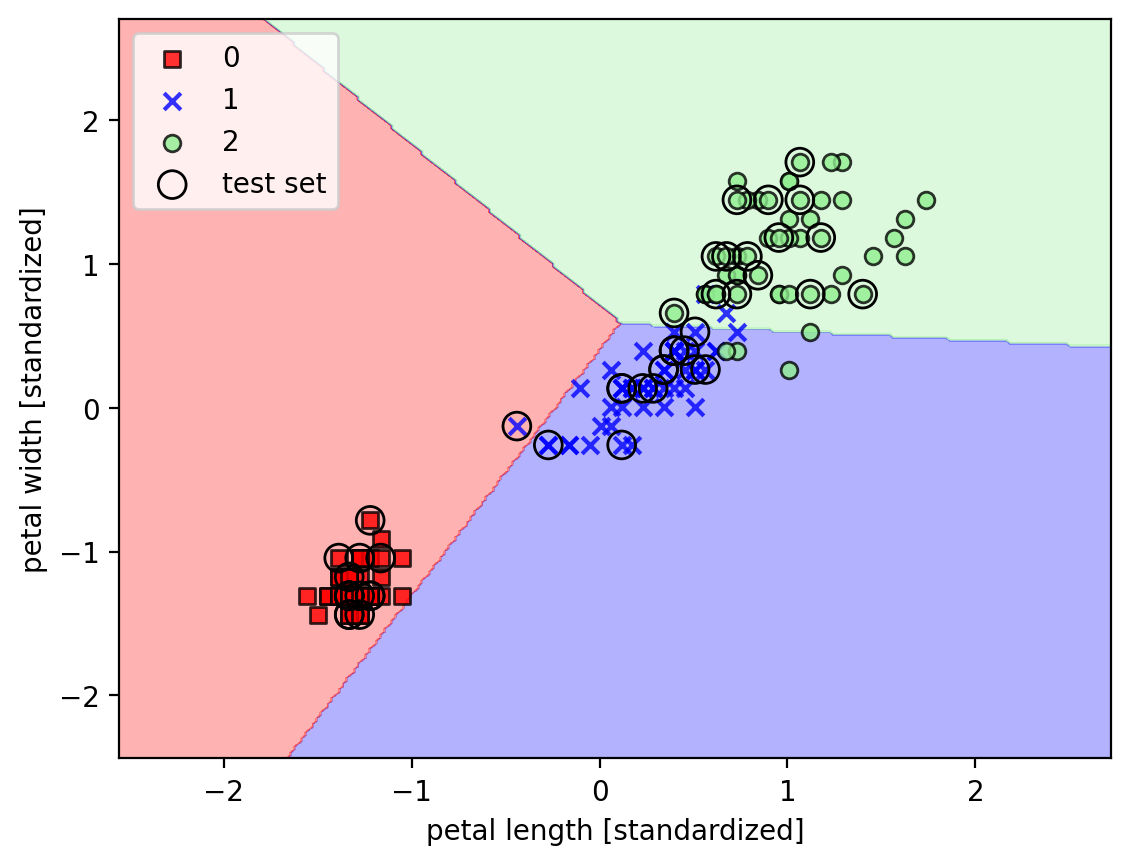

In [64]:
#Decision Regions Plotting

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,
                c = colors[idx], marker = markers[idx],
                label = cl, edgecolor = 'black')
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                alpha=1.0, linewidth = 1, marker = 'o', s=100, label = 'test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Chapter 2 Logistic Regression, SVM, Decision Tree, KNN

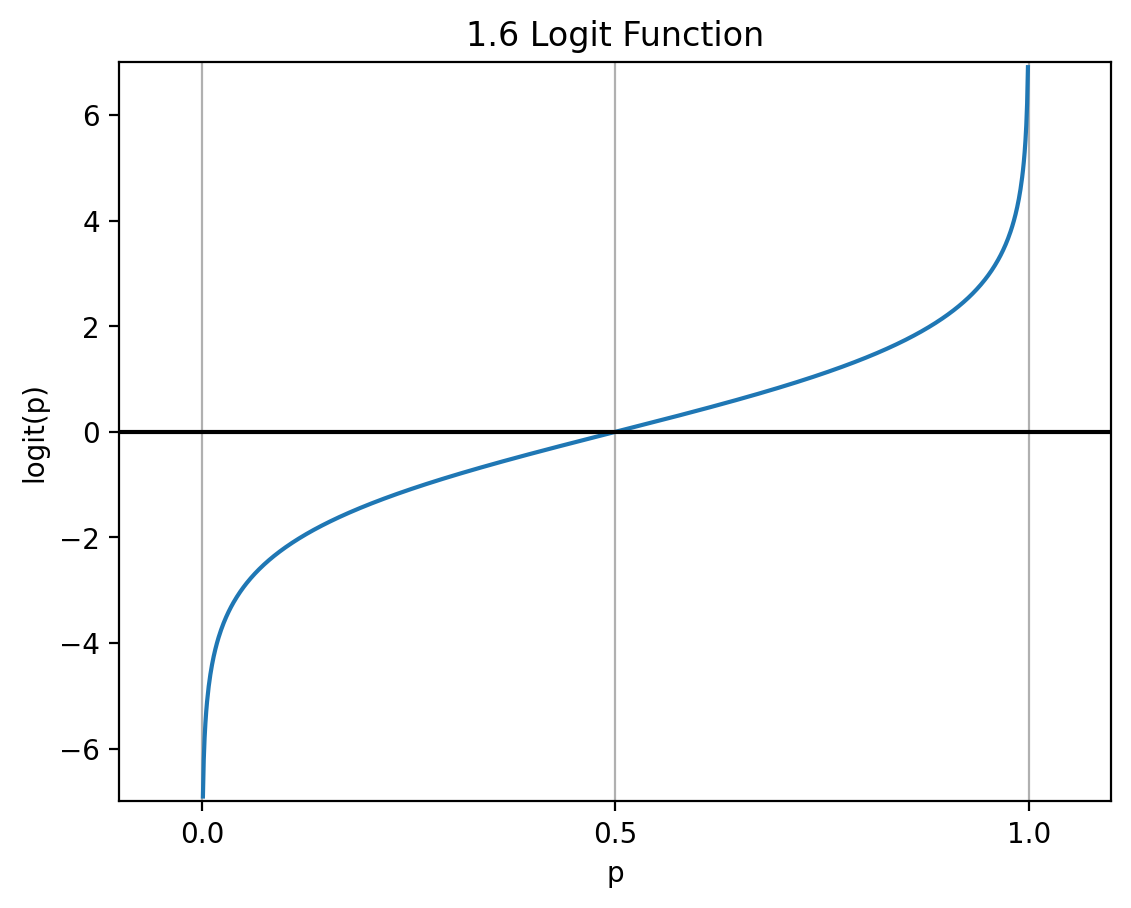

In [65]:
#Logit function

import matplotlib.pyplot as plt
import numpy as np
def logit(p):
    return np.log(p/(1-p))
p = np.arange(0.001, 1, 0.001)
lp = logit(p)
plt.plot(p, lp)
plt.axhline(0, color='k')
plt.xlim(-0.1, 1.1)
plt.ylim(-7,7)
plt.title('1.6 Logit Function')
plt.xlabel('p')
plt.ylabel('logit(p)')
plt.xticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.xaxis.grid(True)
plt.show()

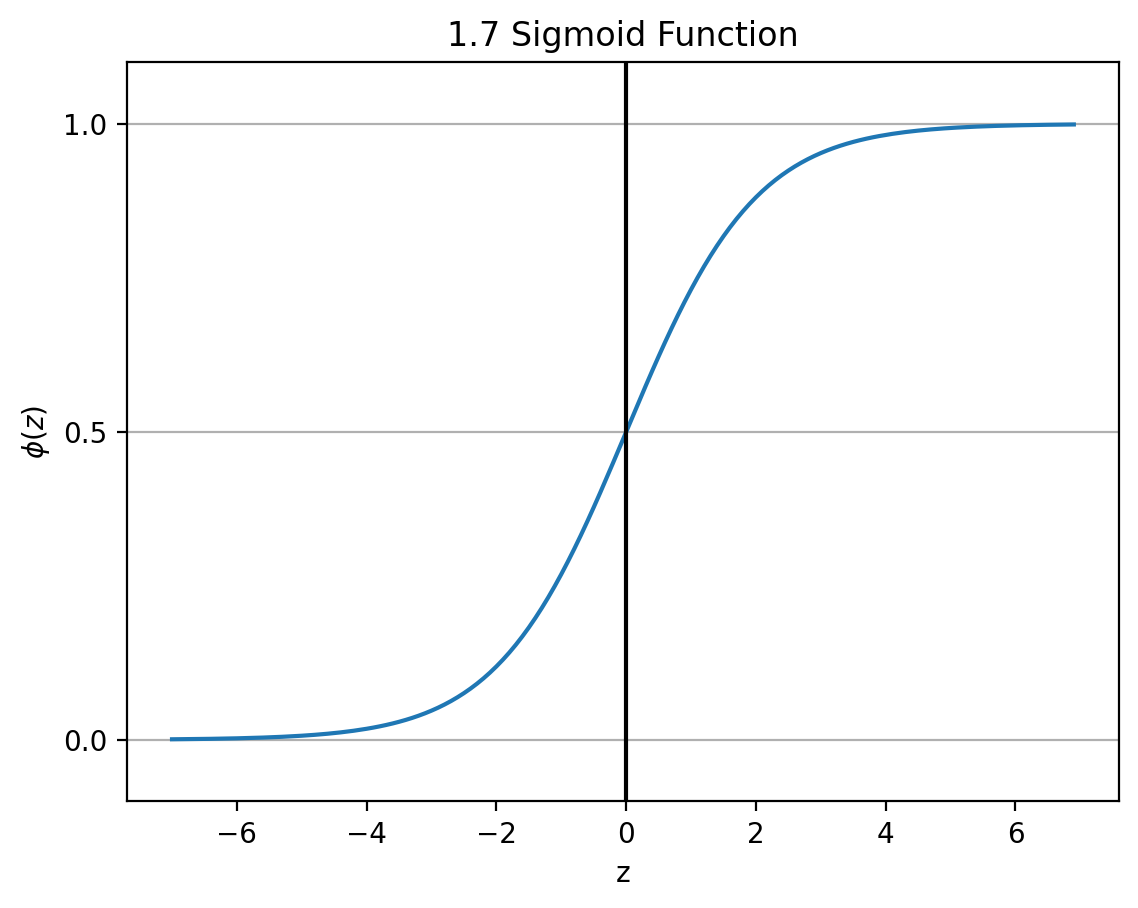

In [66]:
# Inverse of Logit (Sigmoid) Function
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.title('1.7 Sigmoid Function')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()



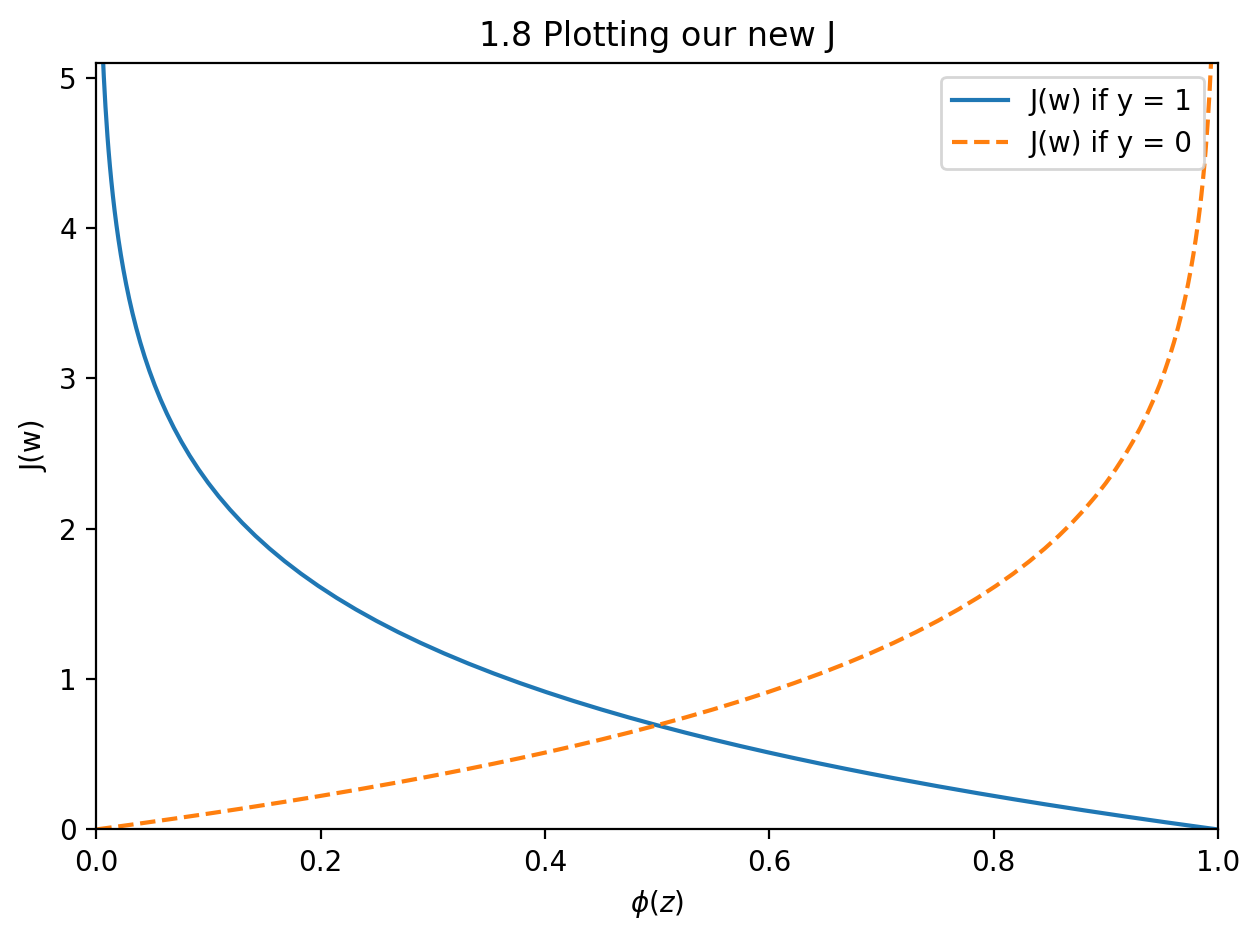

In [67]:
#Plotting our new J
def cost_1(z):
  return -np.log(sigmoid(z))

def cost_0(z):
  return -np.log(1-sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(w) if y = 1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label = 'J(w) if y = 0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi(z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.title('1.8 Plotting our new J')
plt.tight_layout()
plt.show()

<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


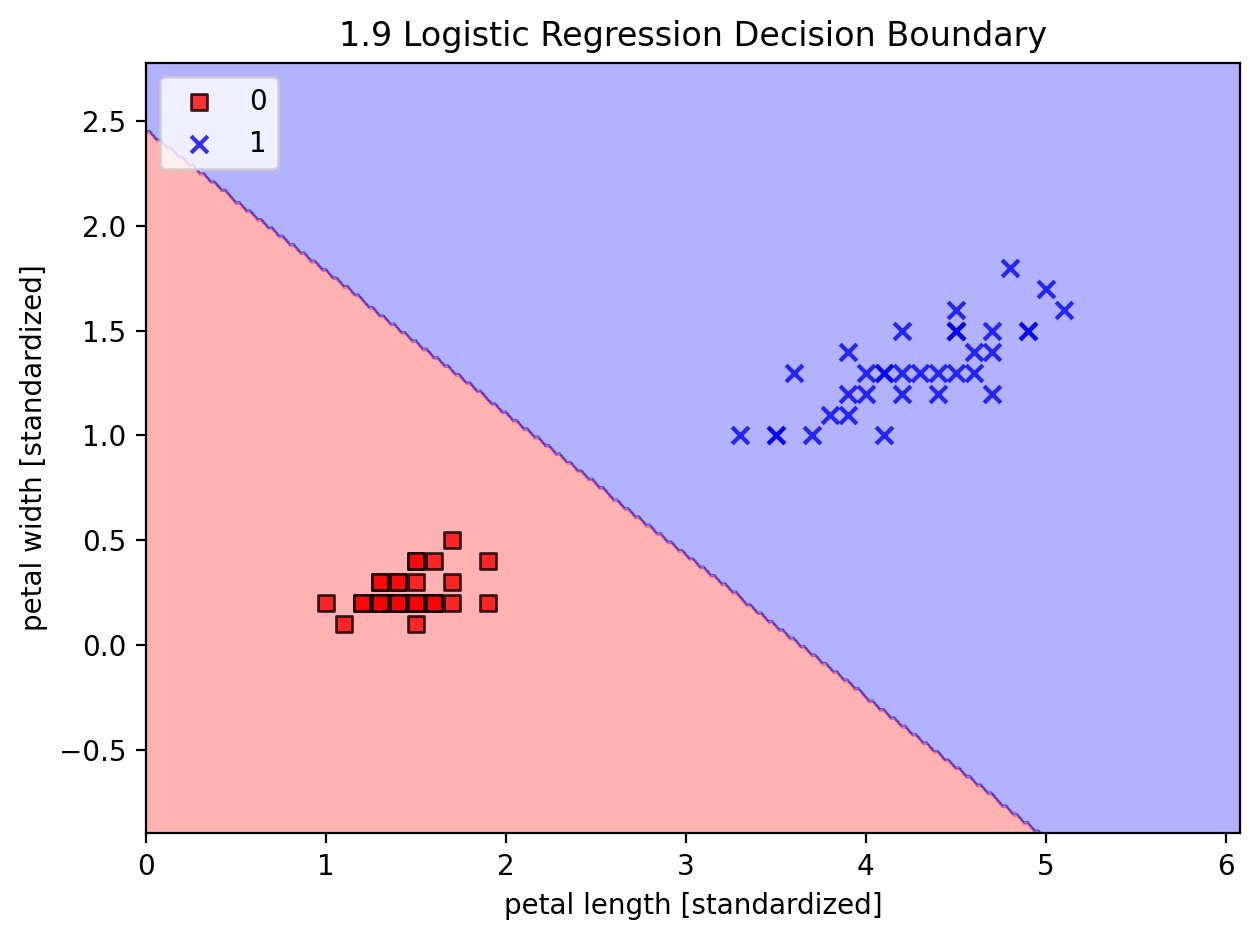

In [68]:


#From Adaline to Logistic Regression

class LogisticRegressionGD(object):
  def __init__(self, eta=0.05, n_iter=100, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1-output)))
      self.cost_.append(cost)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:])+ self.w_[0]
  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  def predict(self, X):
      return np.where(self.net_input(X) >= 0.0, 1, 0)
      # equivalent to :
      #return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

#Display Data using decision regions
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('1.9 Logistic Regression Decision Boundary')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


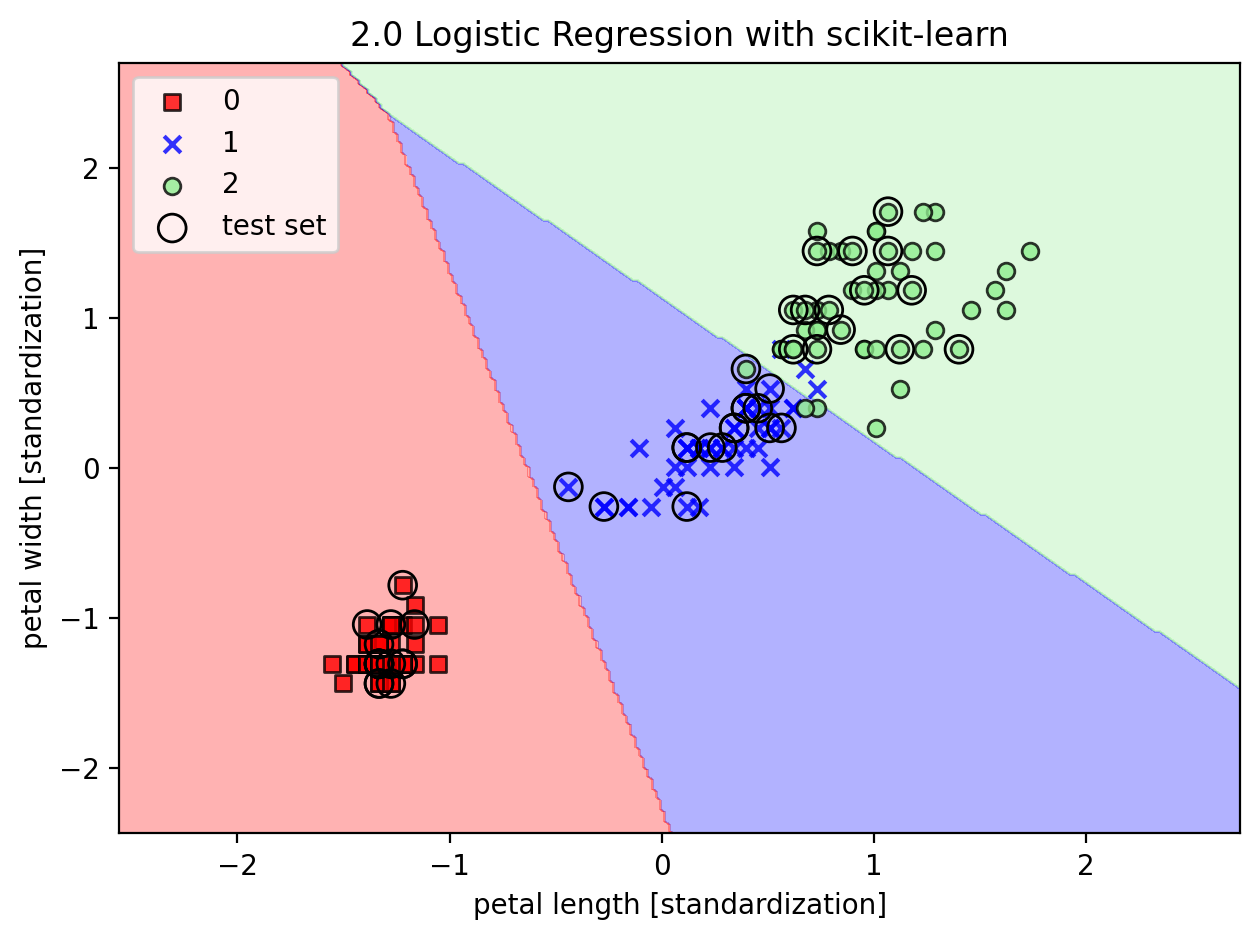

In [69]:
#Logistic Regression with scikit-learn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver="liblinear", multi_class = 'ovr') #OvR by default
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardization]')
plt.ylabel('petal width [standardization]')
plt.title('2.0 Logistic Regression with scikit-learn')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [70]:
#Prediction
#Probability thast training examples belong to a certain class computed

lr.predict_proba(X_test_std[:3, :])


array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [71]:
#And each row the columns sum all up 1
lr.predict_proba(X_test_std[:3, :]).sum(axis = 1)

array([1., 1., 1.])

In [72]:
#Get the predicted class labels by identifying the largest column in each row Using Numpy's argmax function
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)
#Or manual approach to aclling the predic method directly
#lr.predict(X_test_std[:3, :])

array([2, 0, 0])

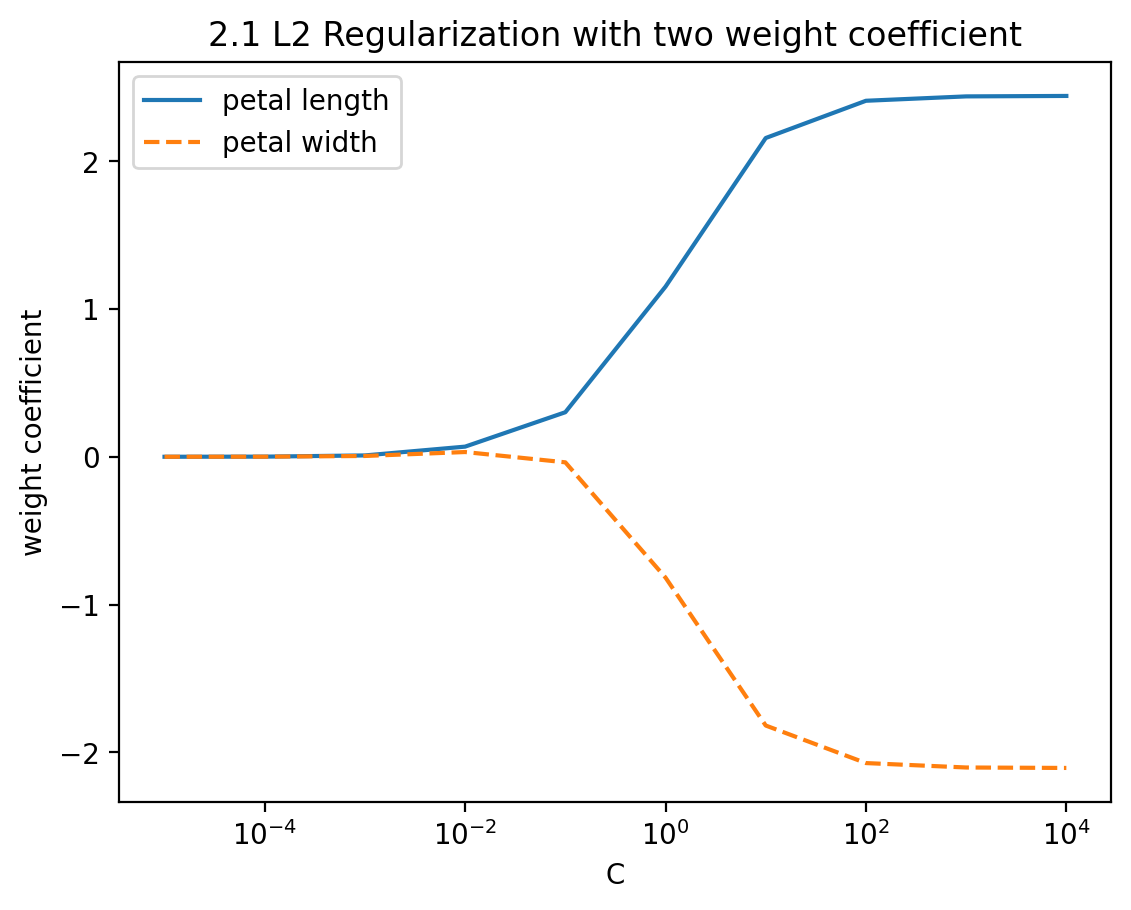

In [73]:
#Regularization

weights,params = [], []
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1, solver='liblinear')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.title('2.1 L2 Regularization with two weight coefficient')
plt.xscale('log')
plt.show()

<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


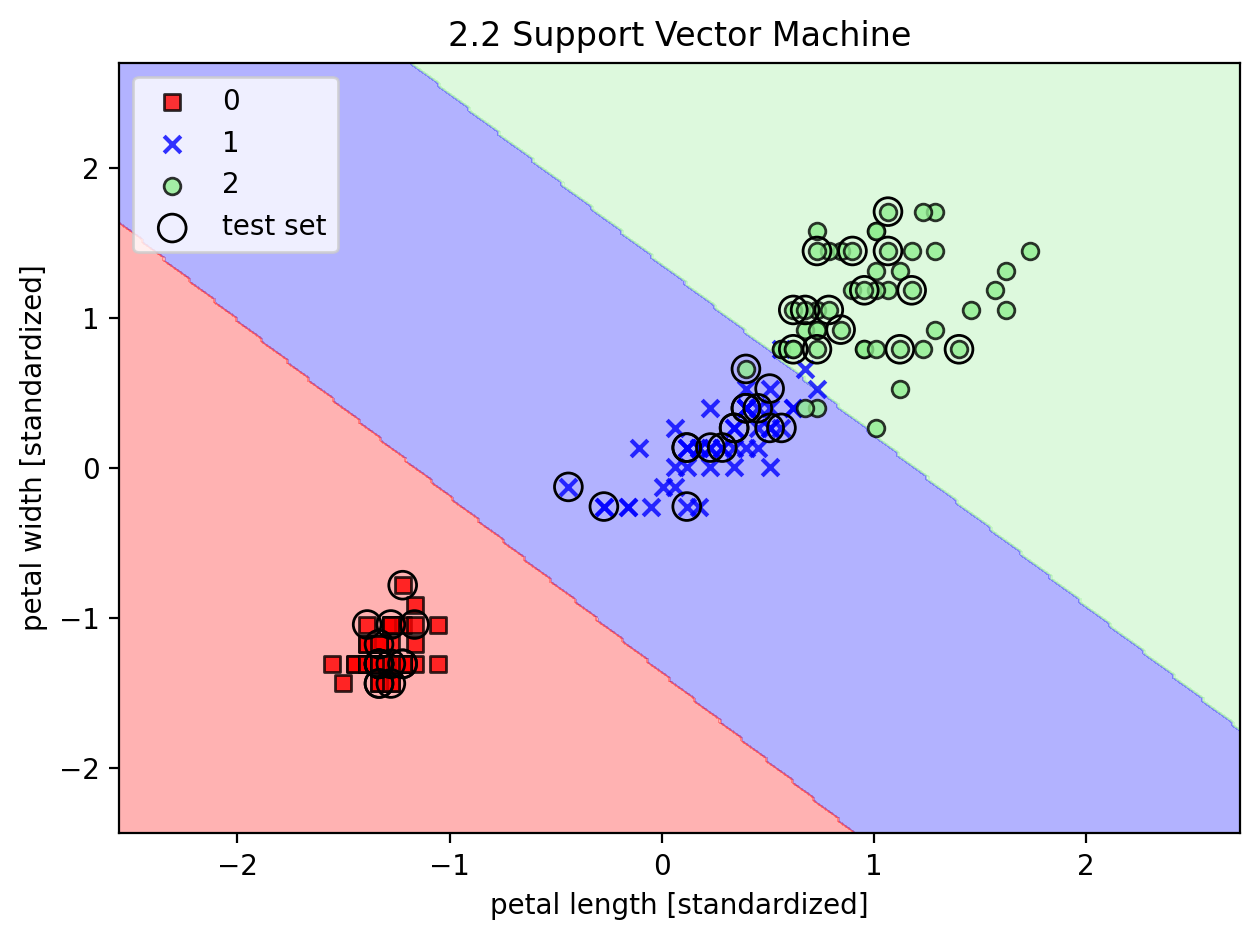

In [74]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('2.2 Support Vector Machine')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
#Alternative Scikit-learn Impelmentations
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

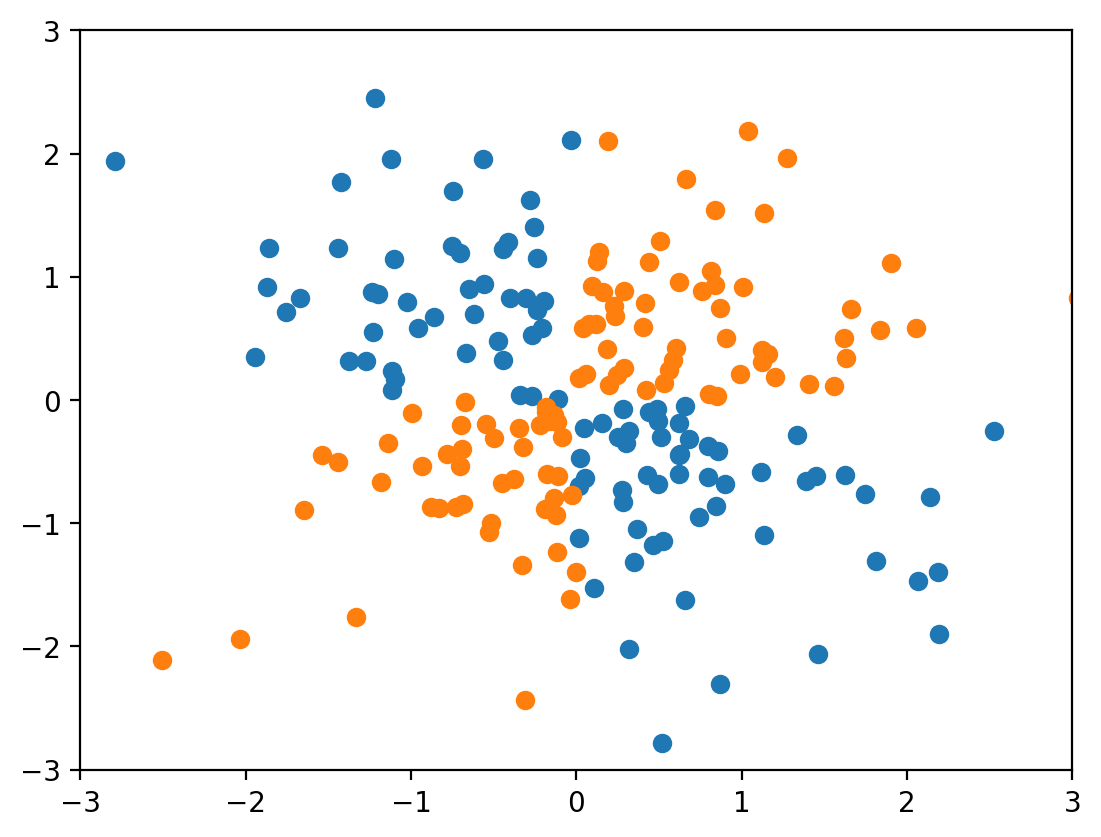

In [76]:
#Kernel SVM
#Linearly inseparable data
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor== 1, 1])
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1])
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


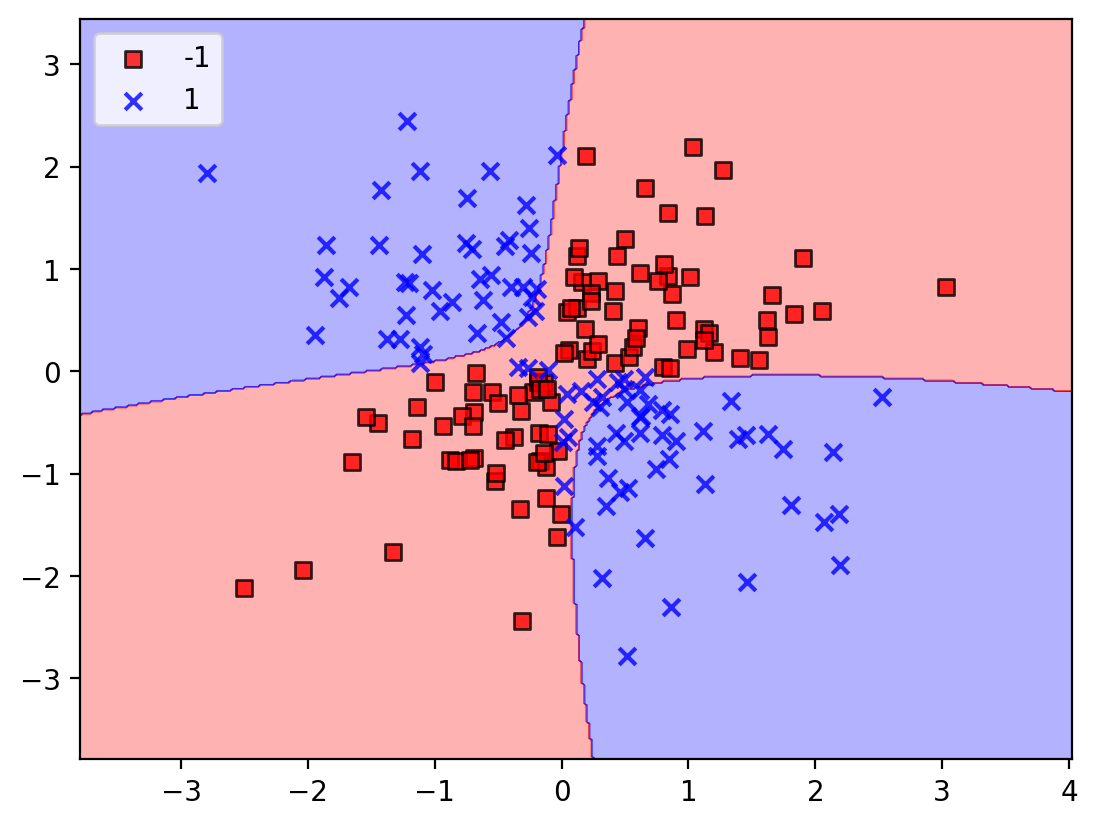

In [77]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C= 10.0, gamma = 0.1, random_state= 1)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc='upper left')
plt.show()

<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


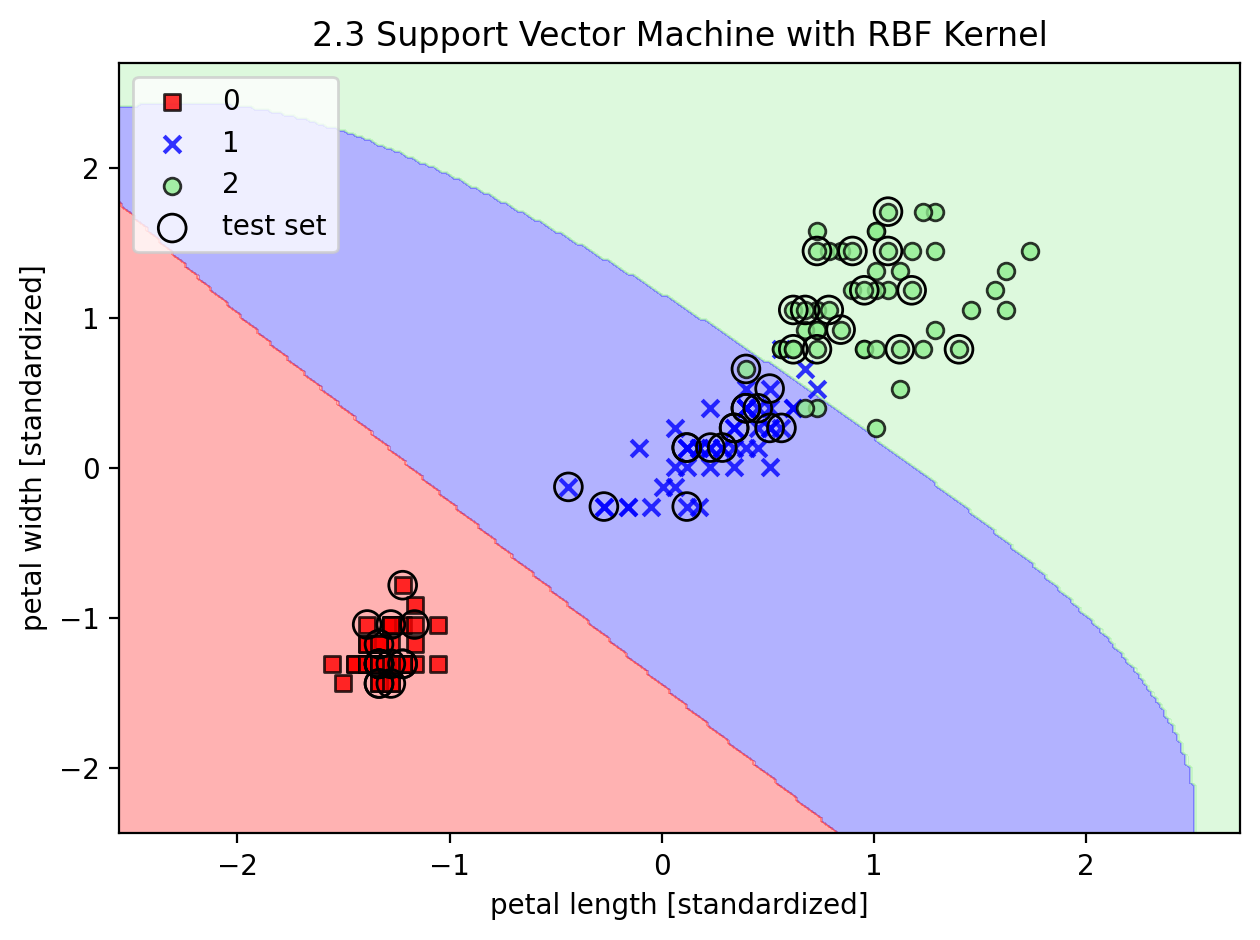

In [78]:
#Gamma = cut-off parameter for the Gaussian
#Increase the gamma value, we decrease the influence or reach of the training smaples, which leads to a tighter and bumpier decision boundary
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 1, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('2.3 Support Vector Machine with RBF Kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


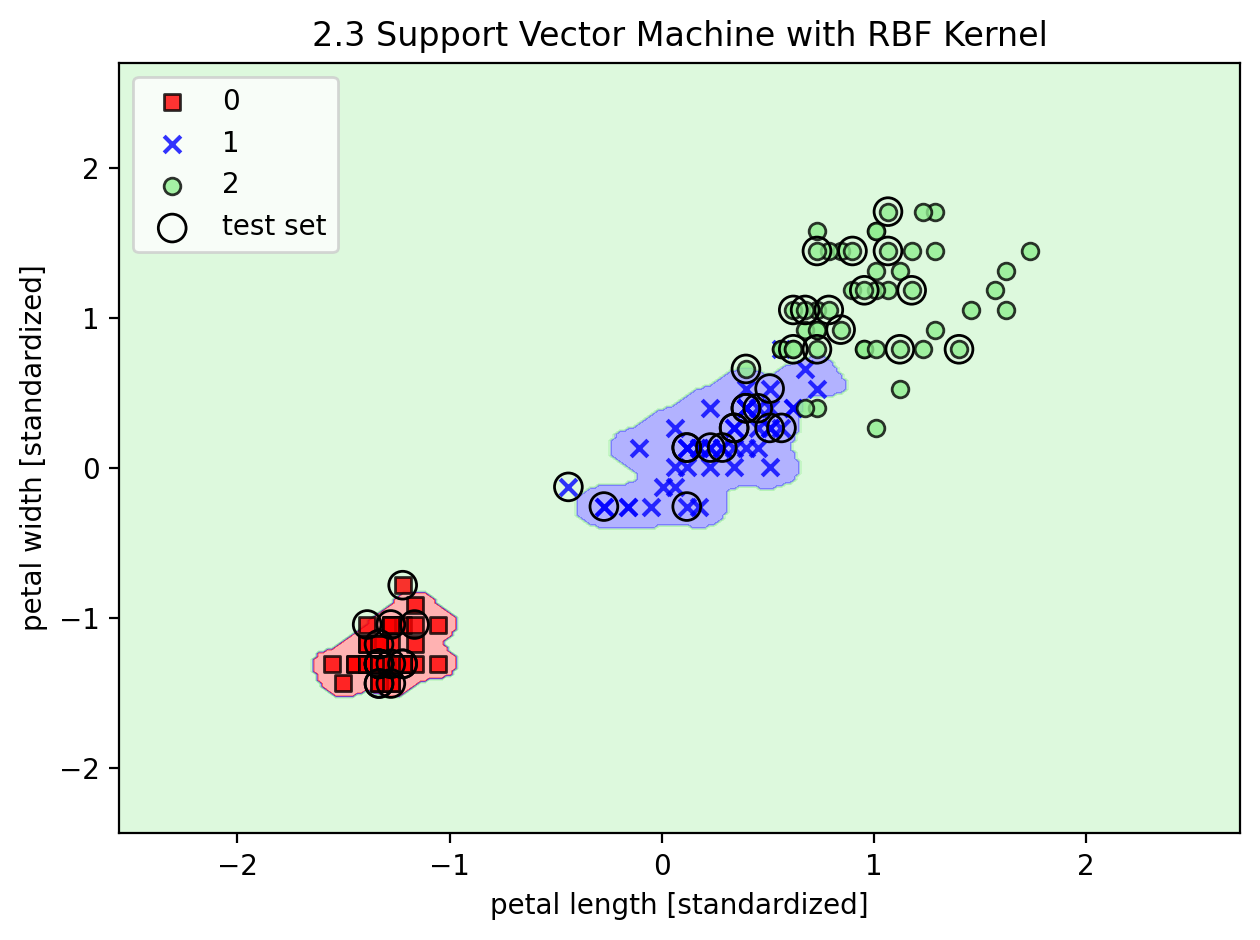

In [79]:
svm = SVC(kernel='rbf', random_state = 1, gamma = 100.0, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.title('2.3 Support Vector Machine with RBF Kernel')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

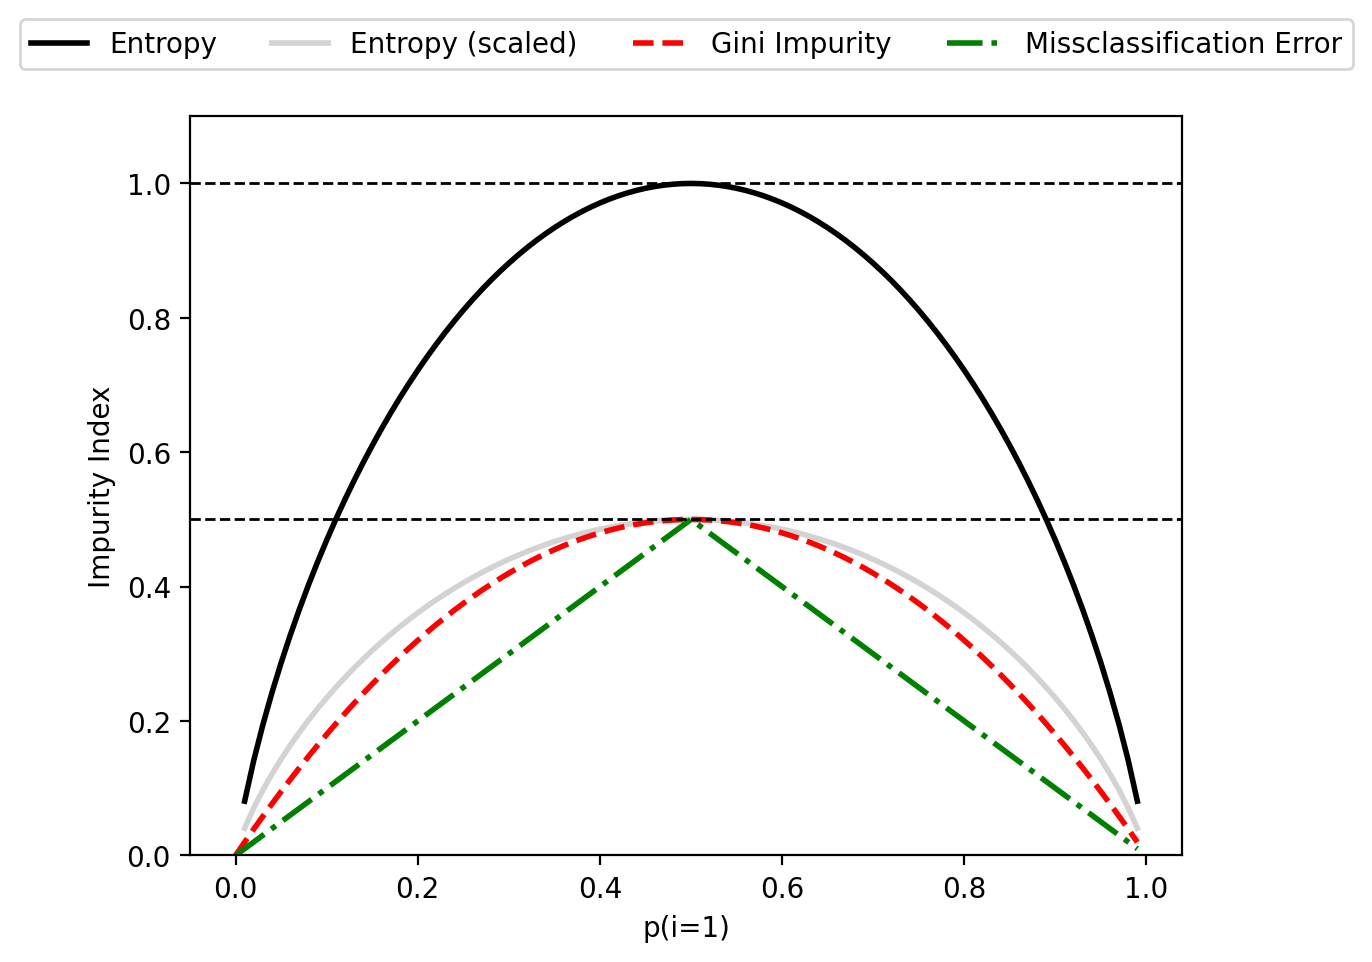

In [80]:
def gini(p):
  return p*(1-p) + (1-p)*(1-(1-p))
def entropy(p):
  return - p* np.log2(p) - (1-p)*np.log2((1-p))
def error(p):
  return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini Impurity', 'Missclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


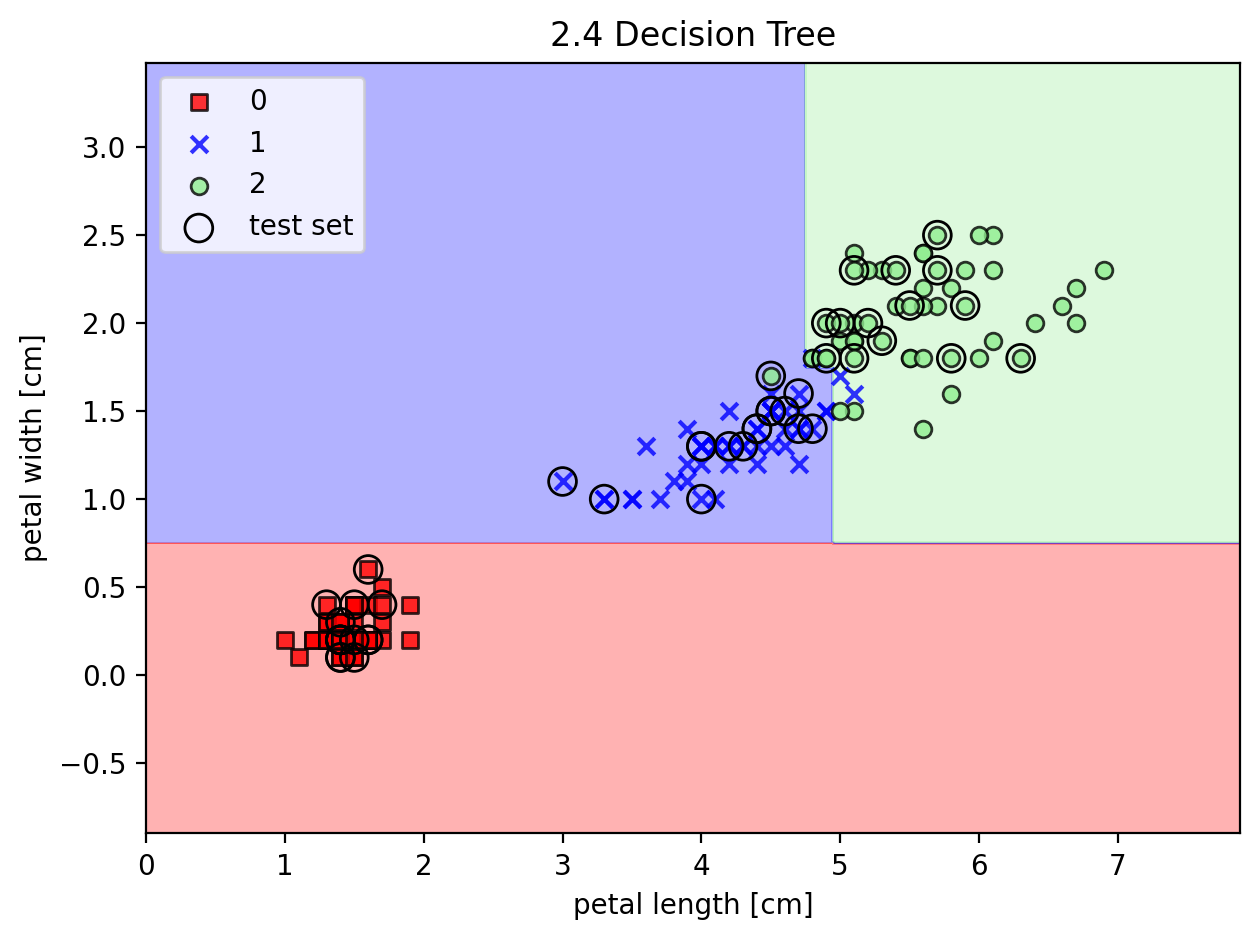

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('2.4 Decision Tree')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [82]:
#The following code will create an image of our decision tree in PNG format
#For this to work you may install
# `sudo apt_get install graphviz`
# `pip install pydotplus`

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, filled=True, rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
from google.colab import files
files.download('tree.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

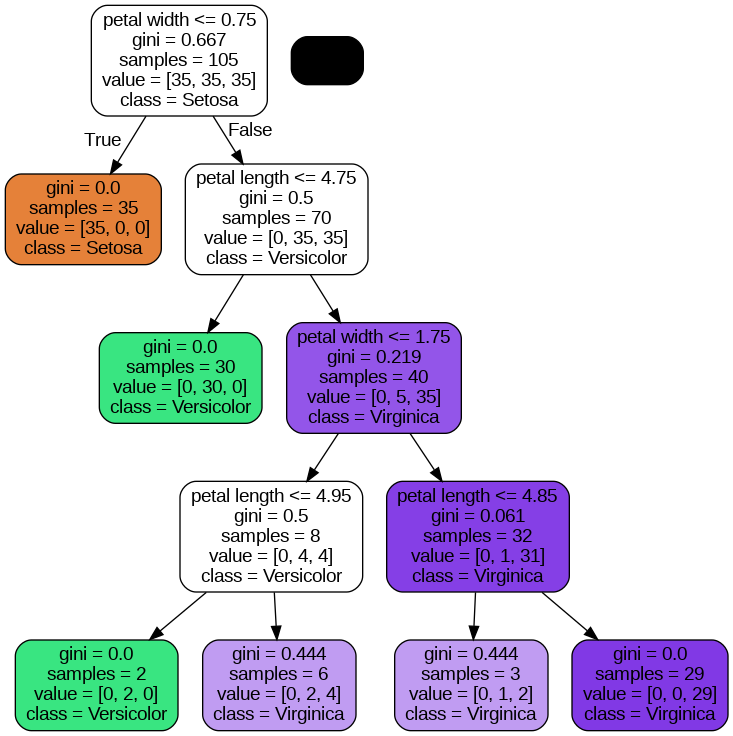

<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


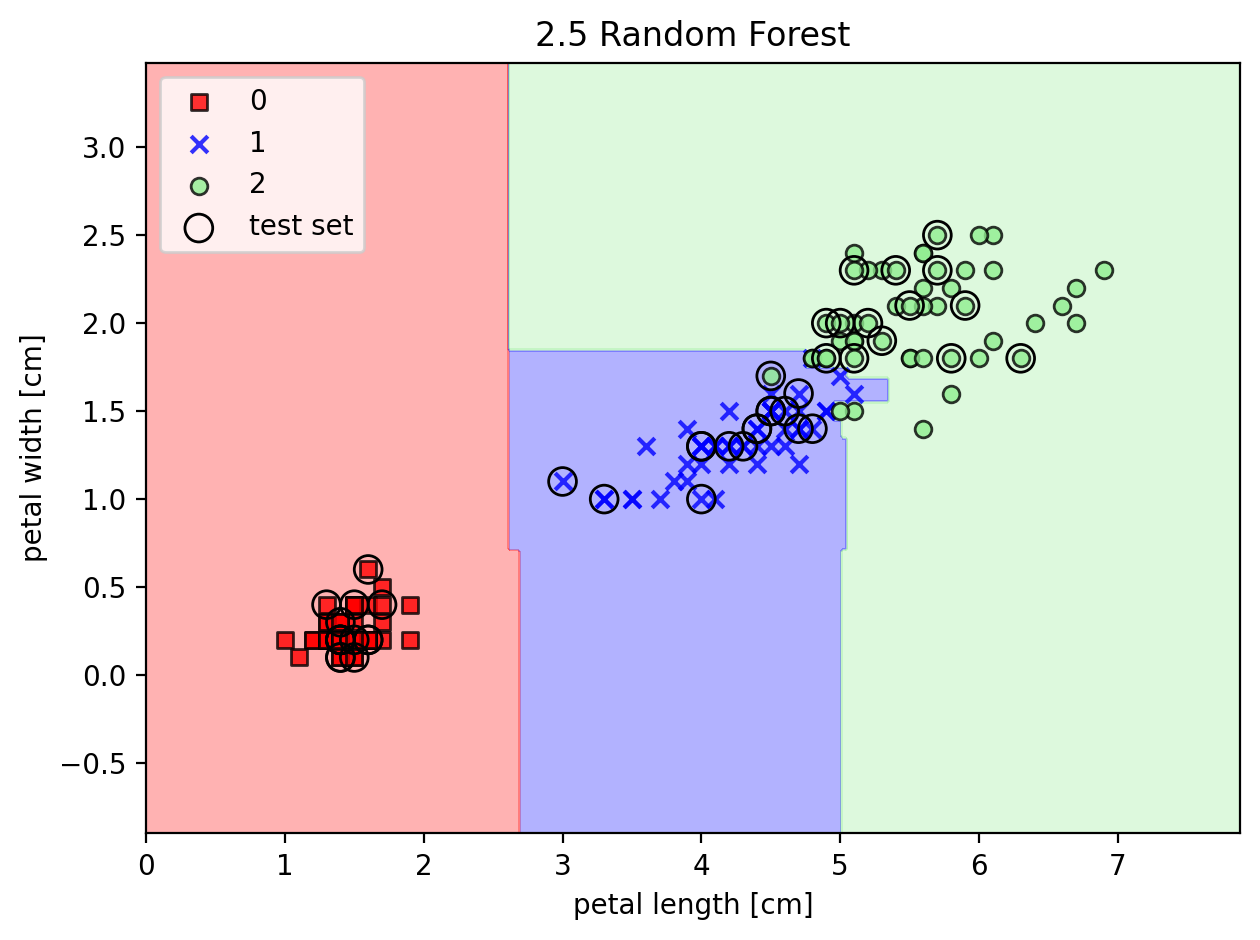

In [83]:
#Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('2.5 Random Forest')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-64-42aed2a3e5c5>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8,


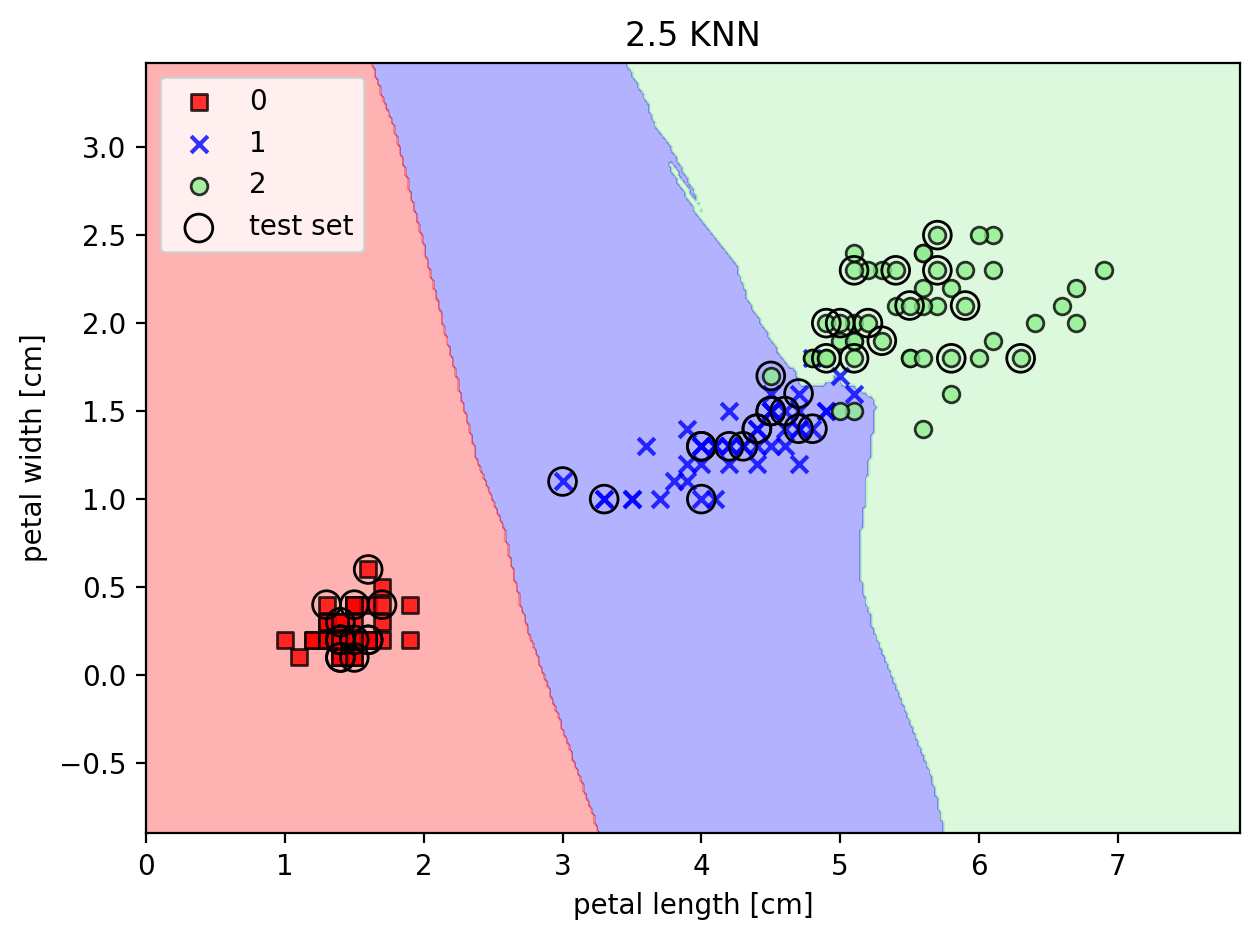

In [84]:
#KNN Implementation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.title('2.5 KNN')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [85]:
#Pre-processing data
#1. How to remove and impute missing values from the dataset
#2. Get categorical data into shape
#3. Select relevant features

'''Speically
- Dealing with missing data
- Nomial and ordinal features
- Partitioning a dataset into training and testing sets
- Bringing features onto the same scale
- Selecting meaningful features
- Sequential feature selection algorithms
- Random Forest'''

'Speically\n- Dealing with missing data\n- Nomial and ordinal features\n- Partitioning a dataset into training and testing sets\n- Bringing features onto the same scale\n- Selecting meaningful features\n- Sequential feature selection algorithms\n- Random Forest'

In [86]:
# Identifying Missing Values
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [87]:
#Using isnull() method to return a Dataframe with Boolean values
#data is missing = True, contains a numeric value = False
#sum() to count the number of missing values per column
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


In [88]:
#Remove Missing Data - remove the corresponding features(column) or samples(row)
df.dropna(axis=0) # axis = 0 , consider rows --> rows with missing value can be dropped
df.dropna(axis=1) # axis = 1, consider columns --> columns with missing value can be dropped
#additional parameters
"""
how='all' - drop rows where all columns are NaN
thresh=n - drop rows that have less than n real values
subset=['C'] - drop rows where NaN appear in specific columns
"""

"\nhow='all' - drop rows where all columns are NaN\nthresh=n - drop rows that have less than n real values\nsubset=['C'] - drop rows where NaN appear in specific columns\n"

In [89]:
# Interpolation

from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
"""
strategy can be:
- median
- most_frequent
- constant, fill_value=42
mean and median are for numerical data only while others can be used for string as well.
"""
print(df.values)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(imputed_data)

[[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]
[[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


In [90]:
# Example Dataset for data preprocessing
df2 = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                    ['red', 'L', 13.5, 'class1'],
                    ['blue', 'XL', 15.3, 'class2']])
df2.columns = ['color', 'size', 'price', 'classlabel']
df2

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [91]:
# Mapping Ordinal Features
# Converting string values to int
size_mapping = {'XL':3, 'L':2, 'M':1}
df2['size'] = df2['size'].map(size_mapping)
df2

# Reverse mapping to go back
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df2['size'].map(inv_size_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [92]:
#Encoding Class Labels - Integer Encoding
class_mapping = {label:idx for idx,label in enumerate(np.unique(df2['classlabel']))}
df2['classlabel'] = df2['classlabel'].map(class_mapping)
df2

# Inverse mapping
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df2['classlabel'] = df2['classlabel'].map(inv_class_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [93]:
# Alternative using LabelEncoder provided by scikit-learn
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df2['classlabel'].values)
y

array([1, 0, 1])

In [94]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [95]:
# One Hot Encoding - transform nominal color column
X = df2[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X
# PROBLEMATIC !
# model may assume that red > green > blue
# thus, One Hot Encoding --> create a dummy feature for each unmique value of nominal features
from sklearn.preprocessing import OneHotEncoder
X = df2[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray() #reshape -1 means unknown dimension and we want numpy to figure it out


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [96]:
# One Hot Encoding via ColumnTransformer, scikit-learn
from sklearn.compose import ColumnTransformer
X = df2[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
#   (name, transformer, columns)
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1,2])
    ])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [97]:
# One Hot Encoding via Pandas
# create dummy features via one hot encoding - use get_dummies method
pd.get_dummies(df2[['price', 'color', 'size']])
# get_dummies only convert string colunmns

#Dropping first feature
# we do not lose any information by removing one dummy column
pd.get_dummies(df2[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


In [105]:
#From here, we use UCL Wine Dataset
# 178 wine samples with 13 features describing their different chemical properties
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [107]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
print(np.unique(df_wine['Class label']))
df_wine.head()

[1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
#Dataset splitting
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [114]:
# Feature Scaling
# Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print("----Normalization----")
print(X_train[:, 0].max(axis=0))
print(X_train[:, 0].min(axis=0))
print(X_train_norm[:, 0].max(axis=0))
print(X_train_norm[:, 0].min(axis=0))
print(X_test_norm[:, 0].max(axis=0))
print(X_test_norm[:, 0].min(axis=0))
# Standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print("\n----Standardization----")
print(X_train[:, 0].mean())
print(X_train[:, 0].std())
print(X_train_std[:, 0].mean())
print(X_train_std[:, 0].std())


----Normalization----
14.83
11.41
1.0
0.0
0.871345029239766
-0.11111111111111116

----Standardization----
13.033548387096777
0.8233685663454646
6.87935371750596e-15
0.9999999999999998


In [115]:
# Regularization
# Sparse solution

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9814814814814815


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [116]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_ = [score]
    while dim > self.k_features:
      scores = []; subsets = []
      for p in combinations(self.indices_, r = dim - 1):
        score = self._calc_score(X_train, y_train, X_test, y_test, p)
        scores.append(score)
        subsets.append(p)
      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim -= 1
      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]
    return self
  def transform(self, X):
    return X[:, self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score

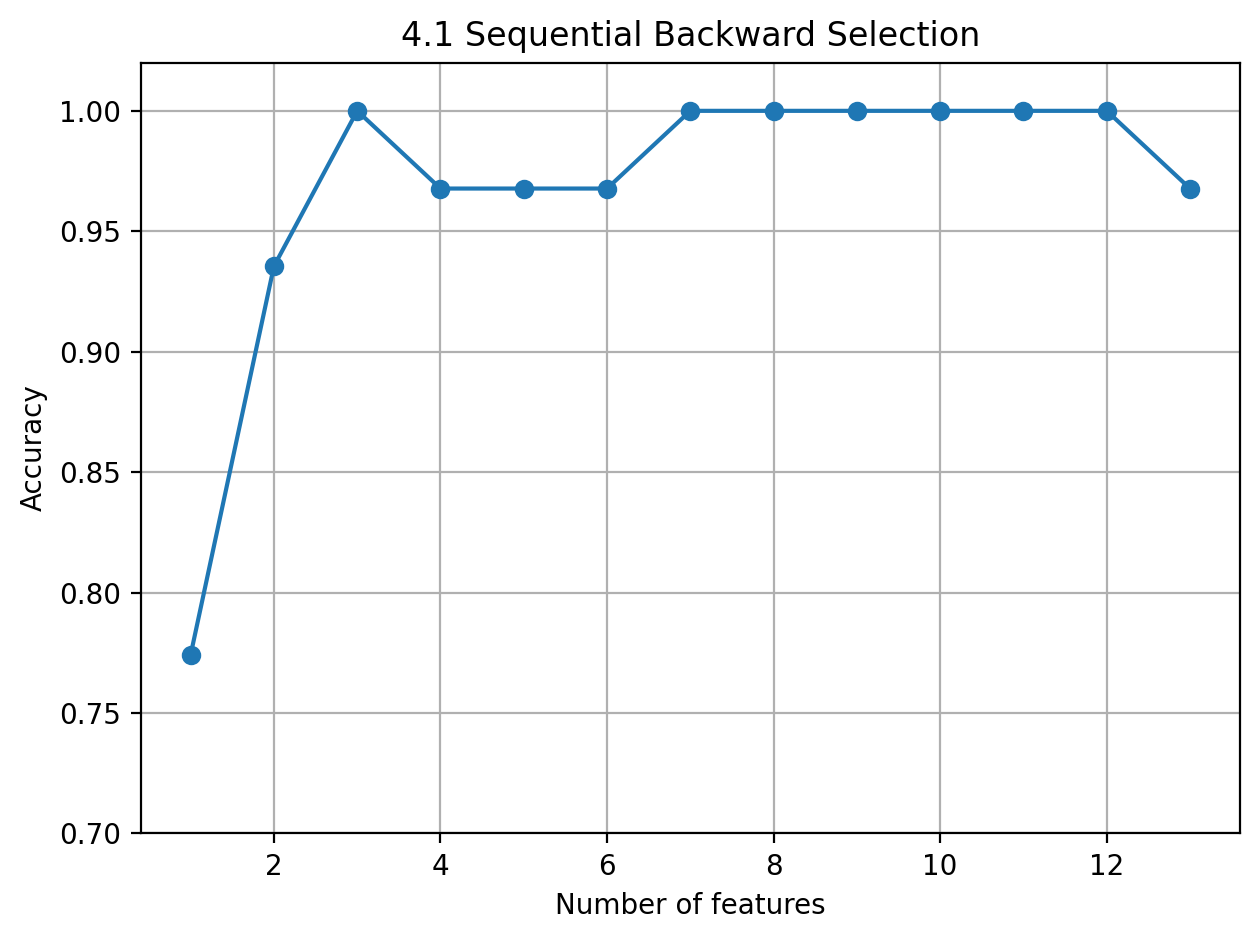

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('4.1 Sequential Backward Selection')
plt.grid()
plt.tight_layout()
plt.show()

In [122]:
#SBS - Analysing the result

print('The smallest feature subset that yielded such a good performance on the validation dataset has the following features')
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3], '\n')



print('The accuracy of the KNN classifier on the original test set is as follow:')
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test) , '\n')

print('The three-feature subset has the following accuracy')
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy: ', knn.score(X_test_std[:, k3], y_test))

The smallest feature subset that yielded such a good performance on the validation dataset has the following features
Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object') 

The accuracy of the KNN classifier on the original test set is as follow:
Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629 

The three-feature subset has the following accuracy
Training accuracy:  0.9516129032258065
Test accuracy:  0.9259259259259259


In [ ]:
#Assessing Feature Importance
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), importances[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()